
## Saffron Skies Airway Paasenger Analysis

##Importing dependencies
Here the necessary libraries required for this analysis is imported


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
plt.style.use('ggplot')

load dataset

In [ ]:
df = pd.read_csv('/content/UK_NATIONAL_AIRLINES_DATA_CW1 (S) (1) (3).csv', encoding='latin-1')

df.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


## Exploratory Data Analysis

In [ ]:
df.columns

Index(['Ref', 'id', 'Gender', 'Satisfied', 'Age', 'Age Band', 'Type of Travel',
       'Class', 'Flight Distance', 'Destination', 'Continent',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Satisfied                          103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Age Band                           103904 non-null  object 
 6   Type of Travel                     103904 non-null  object 
 7   Class                              103904 non-null  object 
 8   Flight Distance                    103904 non-null  int64  
 9   Destination                        103904 non-null  object 
 10  Continent                          103904 non-null  object 
 11  Inflight wifi service              1039

In [ ]:
# removing Ref and setting ID as index

df.drop('Ref',inplace=True,axis=1)
df.set_index('id',drop=True,inplace=True)
df.drop('Age Band', inplace =True,axis=1) # dropping age band
df.head()

,Gender,Satisfied,Age,Type of Travel,Class,Flight Distance,Destination,Continent,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Y,13,Personal Travel,Eco Plus,4760,India,Asia,3,4,...,5,5,4,3,4,4,5,5,25,18.0
5047,Male,N,25,Business travel,Business,235,Republic of Ireland,Europe,0,2,...,1,1,1,5,3,1,4,1,1,6.0
110028,Female,Y,26,Business travel,Business,4760,India,Asia,2,2,...,5,5,4,3,4,4,4,5,0,0.0
24026,Female,Y,25,Business travel,Business,560,Norway,Europe,2,5,...,2,2,2,5,3,1,4,2,11,9.0
119299,Male,Y,61,Business travel,Business,4760,India,Asia,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [ ]:
# check for missing values
df.isna().sum()

,0
Gender,0
Satisfied,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Destination,0
Continent,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [ ]:
# removing Nan since they  are small compared to the nummber fo data points

df.dropna(inplace=True)
df.isna().sum()

,0
Gender,0
Satisfied,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Destination,0
Continent,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [ ]:
# check for uniques values in each column , incase of inconsistencies in data entry

for col in df.columns:
  print(col)
  print(f'number of unique entry : {df[col].nunique()}')
  print(df[col].unique())
  print('==============================================')

Gender
number of unique entry : 2
['Male' 'Female']
Satisfied
number of unique entry : 2
['Y' 'N']
Age
number of unique entry : 75
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
Type of Travel
number of unique entry : 2
['Personal Travel' 'Business travel']
Class
number of unique entry : 3
['Eco Plus' 'Business' 'Eco']
Flight Distance
number of unique entry : 112
[4760  235  560 1180 1060 5715 1175 2610 1450  775 1670 2230 1080 1400
 2520 1620 1020  845 1035 1070  680 5940 3855 3075 1125 3240 1610 1460
 1585  420  555 3130 1075 2425 3000  470 1085  950  430 2455  640 3995
 2405 3625 2980 1390 1600 2100  505 2470 3860 4565  410 3610 1640 1335
  870 3275 2680 3280  795 3065 1345 4175 2580 1480 3525 3160 2710 3595
 2505 3875 1905 3045 1225 3200 3490 3430 2260 1130 1535 1135 3265 2385
 4815  465 2305 3890  915

In [ ]:
# rewriting Europe/Asia (Eurasia) to eurasia

df['Continent'].replace('Europe/Asia (Eurasia)','Eurasia',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 70172 to 62567
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Satisfied                          103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Destination                        103594 non-null  object 
 7   Continent                          103594 non-null  object 
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      103594

<ipython-input-13-8d26470fe195>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Satisfied',palette=['Blue','Red'],stat='percent')


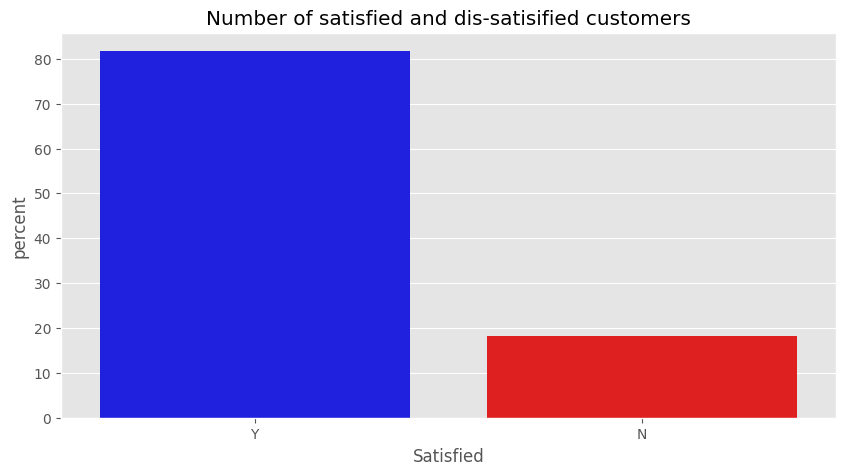

In [ ]:
# Distribution of satisfied coustomers

plt.figure(figsize=[10,5])
sns.countplot(data=df,x='Satisfied',palette=['Blue','Red'],stat='percent')
plt.title('Number of satisfied and dis-satisified customers');

80% of customers are satisfied across our services, then over 20% are not happy with the service they are getting

<ipython-input-14-e133ac694b9d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Gender',palette=['red','orange'])


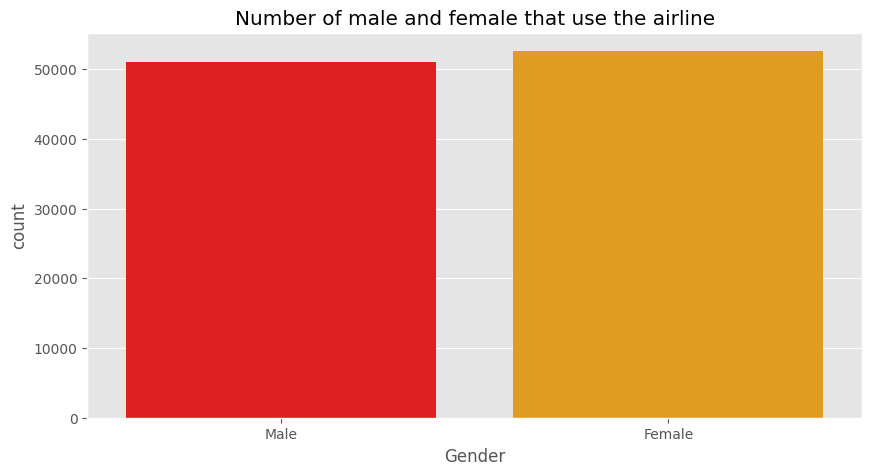

In [ ]:
# Number of male and female that use the airline

plt.figure(figsize=[10,5])
sns.countplot(data=df,x='Gender',palette=['red','orange'])
plt.title('Number of male and female that use the airline');

Almost equal distribution of gender that use the airline

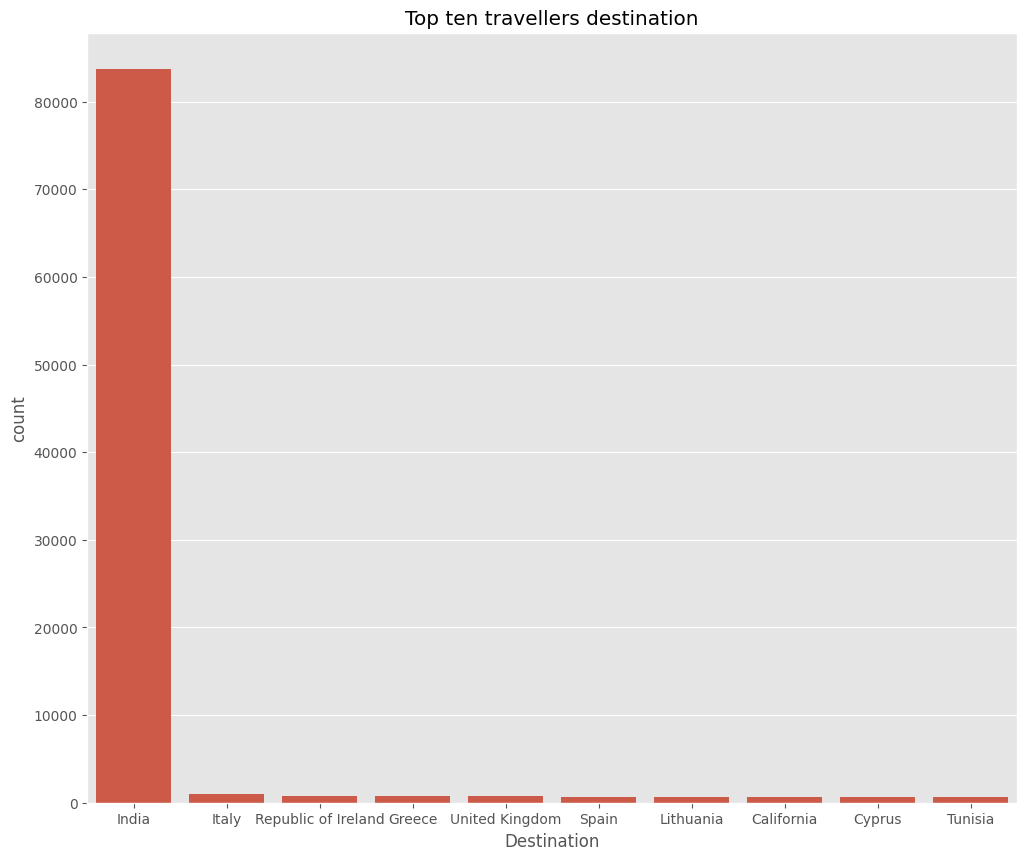

In [ ]:
# TOP TEN DISTINATION
plt.figure(figsize=[12,10])
sns.countplot(data=df,x='Destination',order=df['Destination'].value_counts().index[:10])
plt.title('Top ten travellers destination');

India is the most frequented destination which is very overwhelming

<Figure size 1200x1000 with 0 Axes>

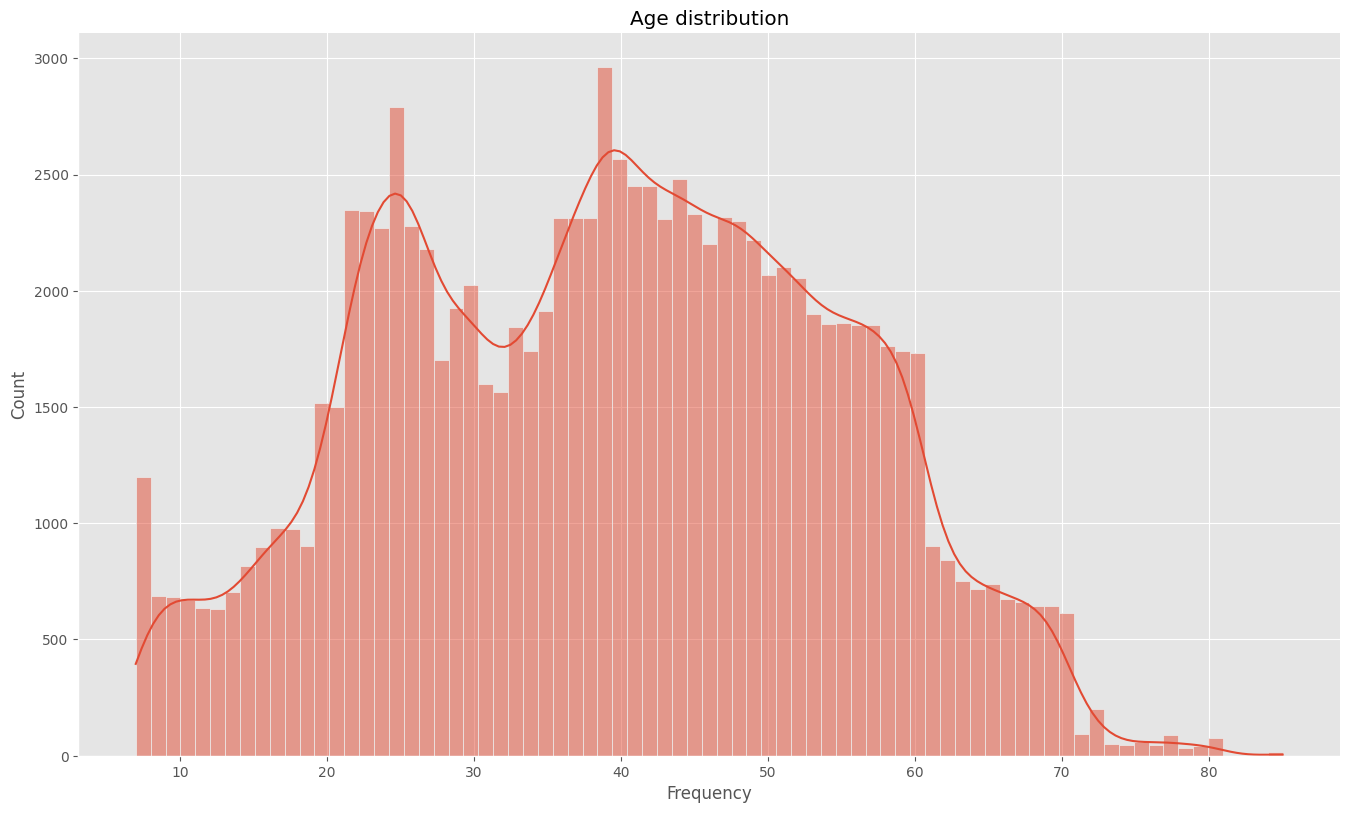

In [ ]:
# The age distribution of customers that use our airline

plt.figure(figsize=[12,10])
sns.displot(data=df,x='Age',height=8,aspect=1.7,kde=True)
plt.title('Age distribution')
plt.xlabel('Frequency');

Age distribution is a normal distribution with the mean age of travellers being around 40 years

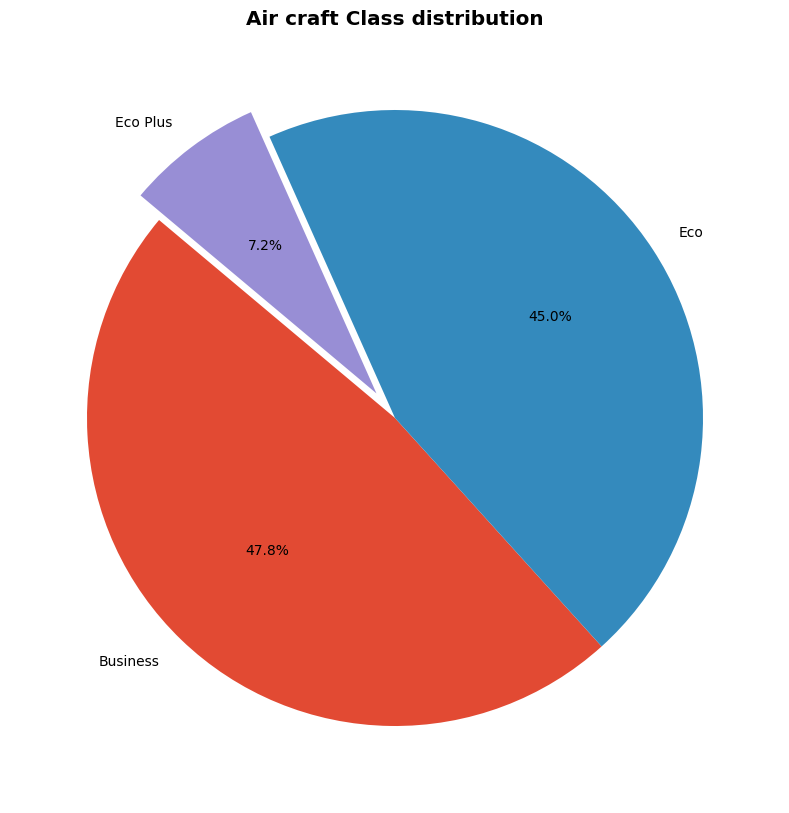

In [ ]:
# what class is being frequented by customers
class_count = df['Class'].value_counts()

plt.figure(figsize=[15,10])
explode = (0, 0, 0.1)
plt.pie(class_count,labels=class_count.index,autopct='%1.1f%%',startangle=140,explode=explode)
plt.title('Air craft Class distribution',fontweight='bold');

Business class had the higher patronage of 47.87%, followed closely by Eco, 45.0% and lastly Eco plus, 7.2%

<ipython-input-18-66a76aca99c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Type of Travel',palette=['green','orange'])


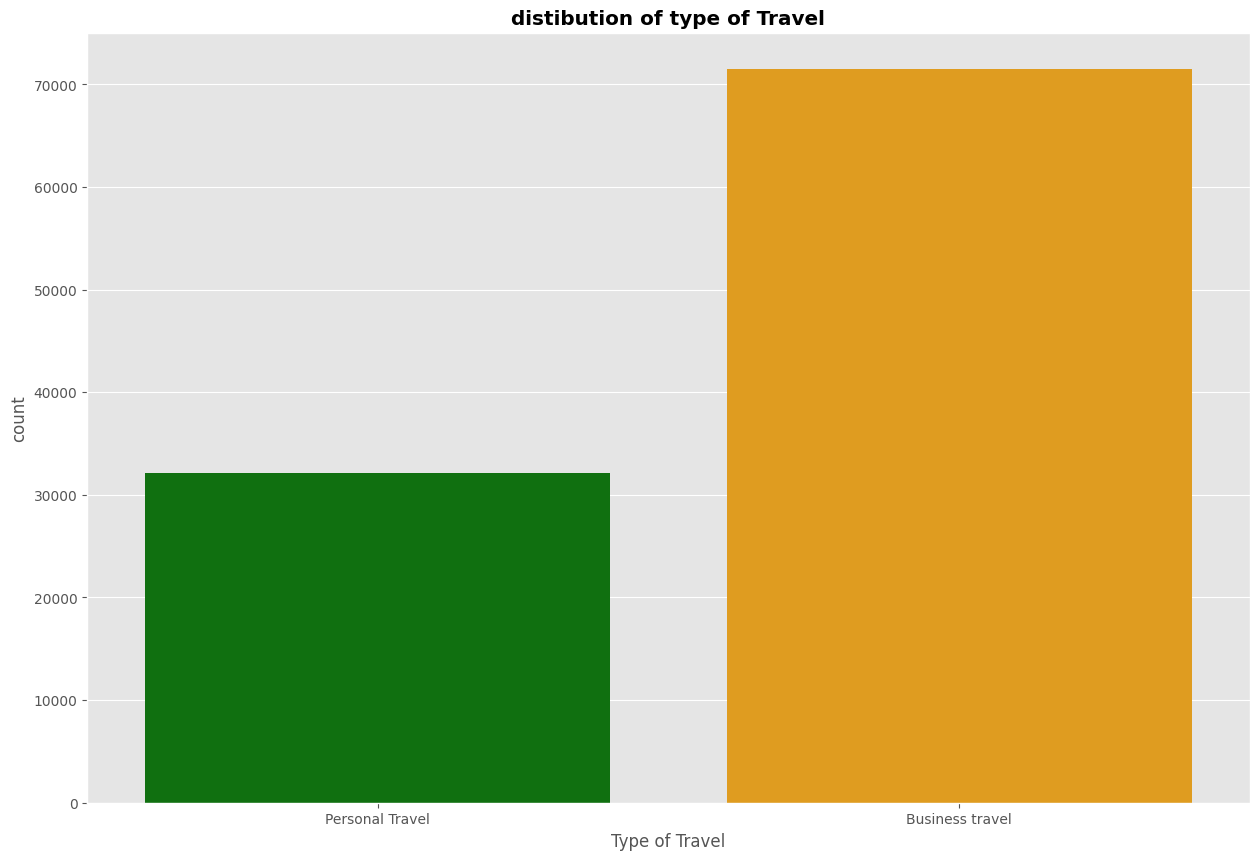

In [ ]:
## type of travel

plt.figure(figsize=(15,10))
sns.countplot(data=df,x='Type of Travel',palette=['green','orange'])
plt.title('distibution of type of Travel',fontweight='bold');

30000 customers used the airline for personal travels , like vacation, shopping ,etc while more than double the number used it for business purposes

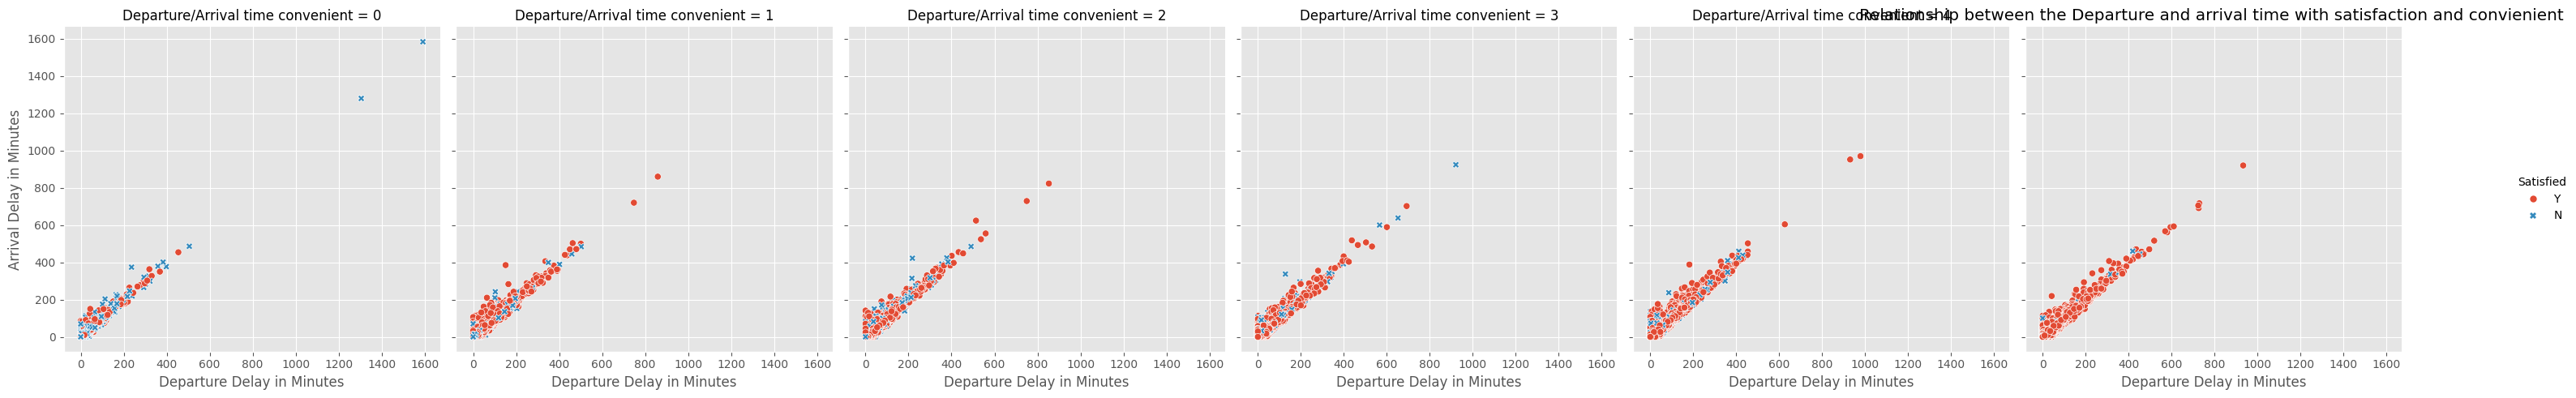

In [ ]:
sns.relplot(
    data=df, x="Departure Delay in Minutes", y="Arrival Delay in Minutes",
    col="Departure/Arrival time convenient", hue="Satisfied", style="Satisfied",
    kind="scatter"
)
plt.title('Relationship between the Departure and arrival time with satisfaction and convienient ');

* There is a strong postive correlation between the aircraft departure time and arrival time i.e the higher the delay in departure and higher the arrival time for arrival at destination, which is obviously valid
* There is no clear definition if the relationship between the two variable affect the customer satisfaction
* Departure and arrival time convienient increases the satisfaction of customers

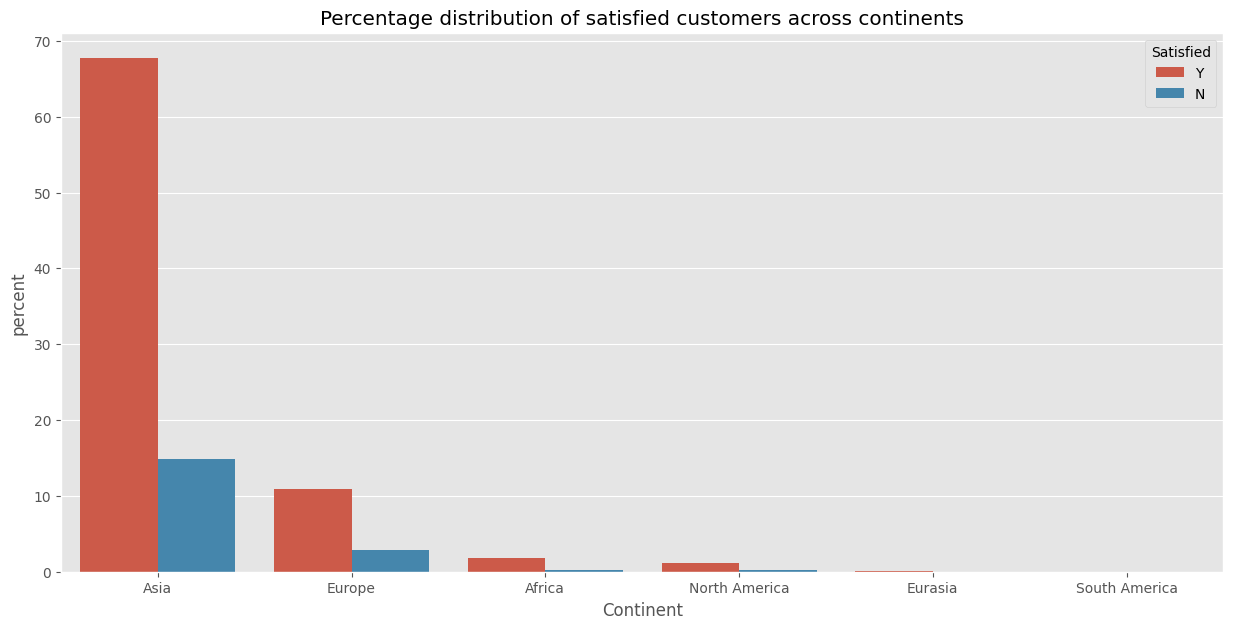

In [ ]:
plt.figure(figsize=[15,7])
sns.countplot(data=df,x='Continent',hue='Satisfied',stat='percent')
plt.title('Percentage distribution of satisfied customers across continents');

* Asia had the higest dis-satisfied customers of over 65%, but also the highest patronage compared to the others , followed by Europe
* Africa seems to have the lowest dis-satisfaction rate


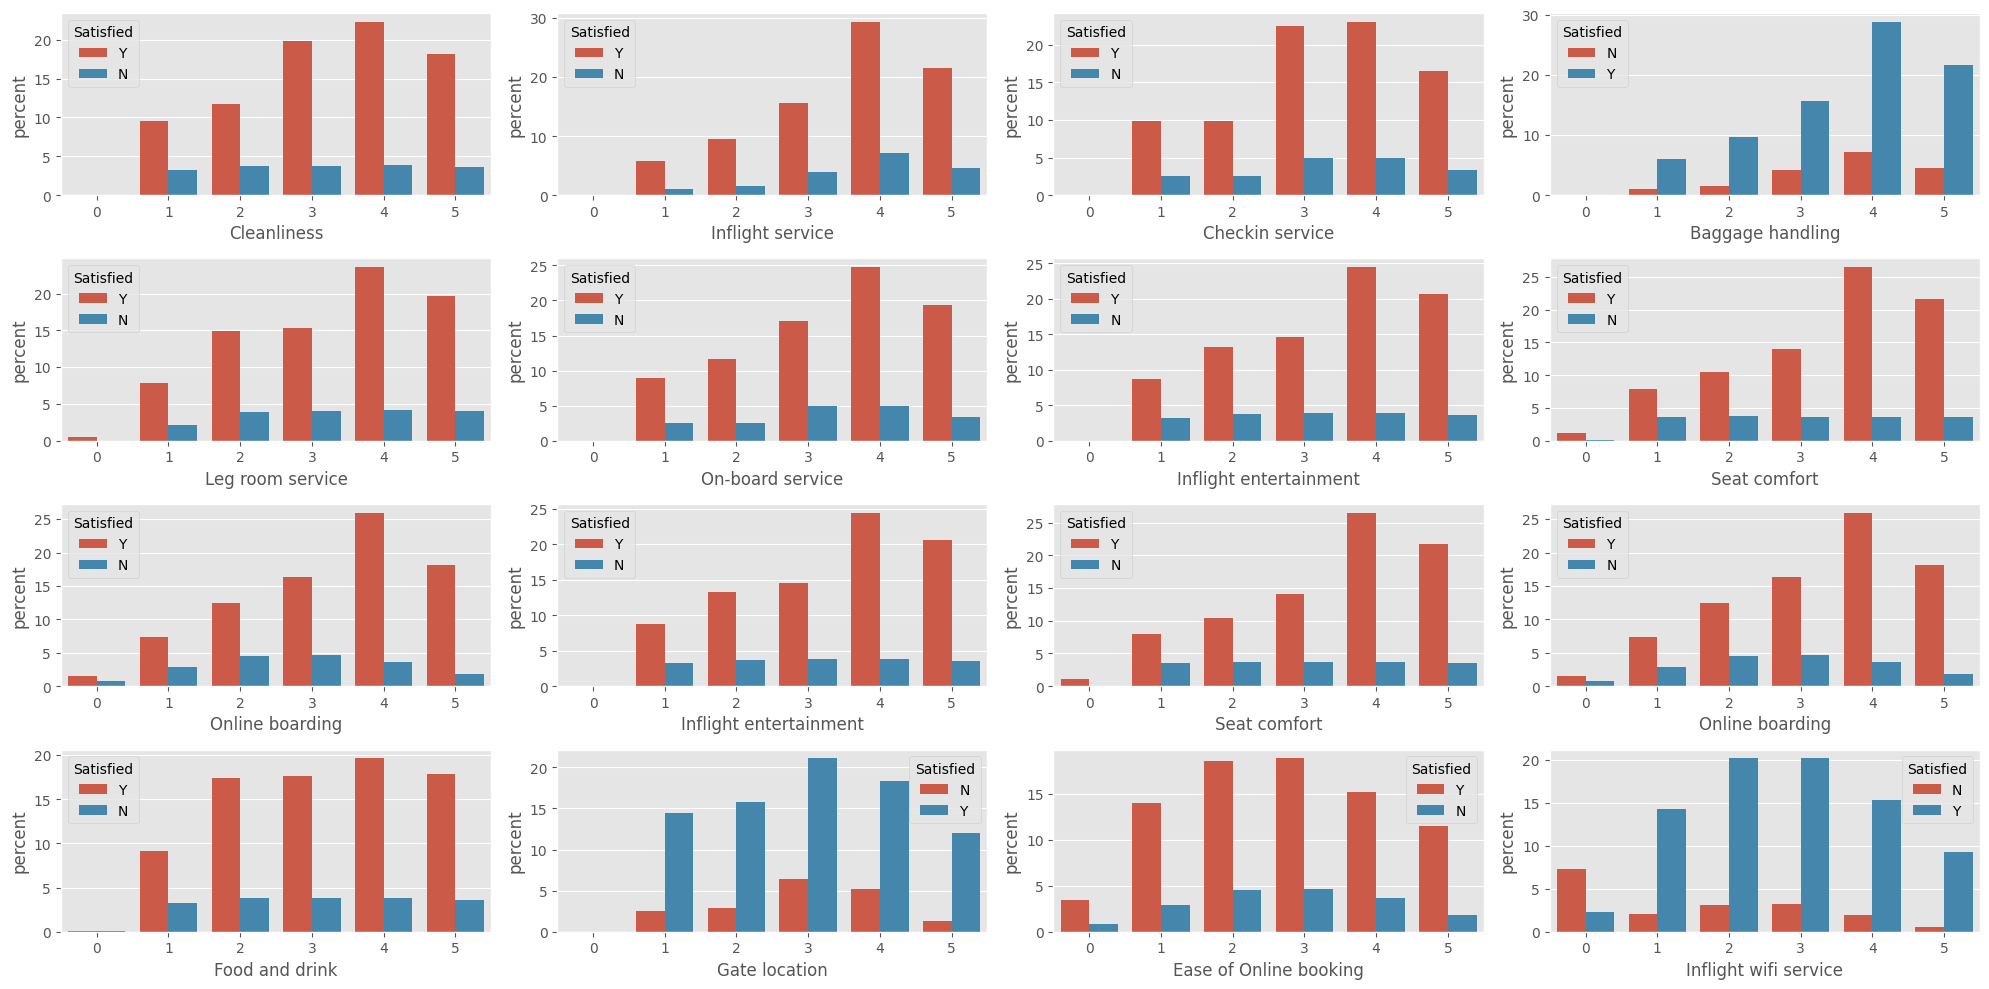

In [ ]:
label = ['Cleanliness','Inflight service','Checkin service','Baggage handling','Leg room service','On-board service','Inflight entertainment','Seat comfort',
         'Online boarding','Inflight entertainment','Seat comfort','Online boarding','Food and drink','Gate location','Ease of Online booking','Inflight wifi service']

# Create a figure with 4 rows and 4 columns
fig, axes = plt.subplots(4, 4, figsize=(20, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for idx, col in enumerate(label):
    sns.countplot(data=df, x=col, hue='Satisfied', ax=axes[idx],stat='percent')

plt.tight_layout()
plt.show()


* We provided great servies in Baggage handling, inflight service and enterntainment and on-board service , which leaded to more satisfied customers
* Poor porformance in inflight wifi service, Ease of online booking and also gate location

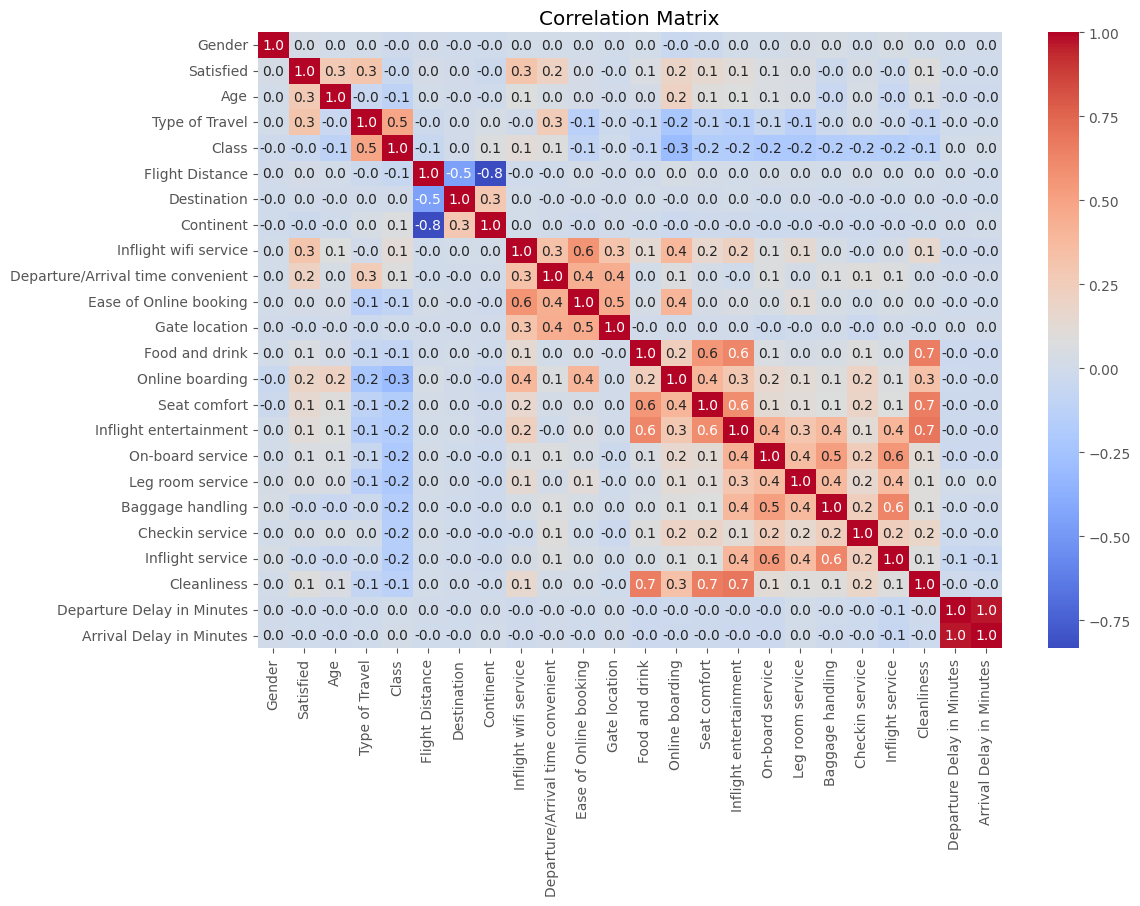

In [ ]:
corr = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

## MODEL BUILDING

In [ ]:
df.head()

,Gender,Satisfied,Age,Type of Travel,Class,Flight Distance,Destination,Continent,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Y,13,Personal Travel,Eco Plus,4760,India,Asia,3,4,...,5,5,4,3,4,4,5,5,25,18.0
5047,Male,N,25,Business travel,Business,235,Republic of Ireland,Europe,0,2,...,1,1,1,5,3,1,4,1,1,6.0
110028,Female,Y,26,Business travel,Business,4760,India,Asia,2,2,...,5,5,4,3,4,4,4,5,0,0.0
24026,Female,Y,25,Business travel,Business,560,Norway,Europe,2,5,...,2,2,2,5,3,1,4,2,11,9.0
119299,Male,Y,61,Business travel,Business,4760,India,Asia,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [ ]:
# handling categorical variables
# converting categorical values to numerical values
label_encoder = LabelEncoder()

categorical_columns =  df.select_dtypes(include=['object']).columns

for column in categorical_columns:
  df[column] = label_encoder.fit_transform(df[column])




df.head()


,Gender,Satisfied,Age,Type of Travel,Class,Flight Distance,Destination,Continent,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
70172,1,1,13,1,2,4760,31,1,3,4,...,5,5,4,3,4,4,5,5,25,18.0
5047,1,0,25,0,0,235,67,3,0,2,...,1,1,1,5,3,1,4,1,1,6.0
110028,0,1,26,0,0,4760,31,1,2,2,...,5,5,4,3,4,4,4,5,0,0.0
24026,0,1,25,0,0,560,60,3,2,5,...,2,2,2,5,3,1,4,2,11,9.0
119299,1,1,61,0,0,4760,31,1,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [ ]:
# spliting data in dependent and independent variables

X = df.drop('Satisfied',axis=1)
y = df['Satisfied']

In [ ]:
# splitting into test and train split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y) # include stratisfy because the data is imbalanced and in order to have similar proportion of labels in both the training and test split


# scaling the numerical values
scaler = RobustScaler()

x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled[['Arrival Delay in Minutes','Departure Delay in Minutes','Flight Distance']] = scaler.fit_transform(x_train_scaled[['Arrival Delay in Minutes','Departure Delay in Minutes','Flight Distance']])
x_test_scaled[['Arrival Delay in Minutes','Departure Delay in Minutes','Flight Distance']] = scaler.transform(x_test_scaled[['Arrival Delay in Minutes','Departure Delay in Minutes','Flight Distance']])

Logistics Regression

In [ ]:
# giving the imbalance label, we will over sample to have more data point for the minority class(dis-satisfied customer)

over_sampler =  SMOTE(random_state=42)
x_train_resampled,y_train_resampled = over_sampler.fit_resample(x_train_scaled,y_train)

In [ ]:
# fitting model for training

model = LogisticRegression()
model.fit(x_train_resampled,y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print(f'accuracy score = {model.score(x_test_scaled,y_test)}')

accuracy score = 0.8142284859307881


### EVALUATE MODEL

In [ ]:
# making predictions
y_preds = model.predict(x_test_scaled)

In [ ]:
# PRINT CLASSIFICATION REPORT
log_result = classification_report(y_test,y_preds,output_dict=True)
print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.76      0.49      0.60      5802
           1       0.83      0.94      0.88     14917

    accuracy                           0.81     20719
   macro avg       0.79      0.72      0.74     20719
weighted avg       0.81      0.81      0.80     20719



* Balanced precision and recall for the positive class (1)
* Lower recall for the negative class (0), meaning many negative instances are missed.
* Precision for the negative class (0) is lower compared to positive class (1), which indicates it might not be as good at identifying negative cases.

Better overall balance but less effective in identifying negative cases.

Text(0.5, 1.0, 'Logistic regression confusion matrx')

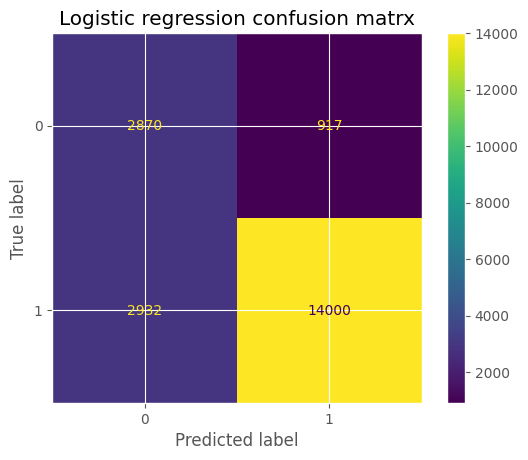

In [ ]:
# plotting confusion matrix
cm = confusion_matrix(y_test, y_preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.title('Logistic regression confusion matrx')

* The model struggles to predict the dis-satisfied customers which is very important as it is costlier to avoid due it can lead to customer churn, but it did very well on the satisfied customers

## feature Importance

This are the variable that contributed to the mmodel performance

<ipython-input-32-efa28d687fed>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance, palette='viridis')


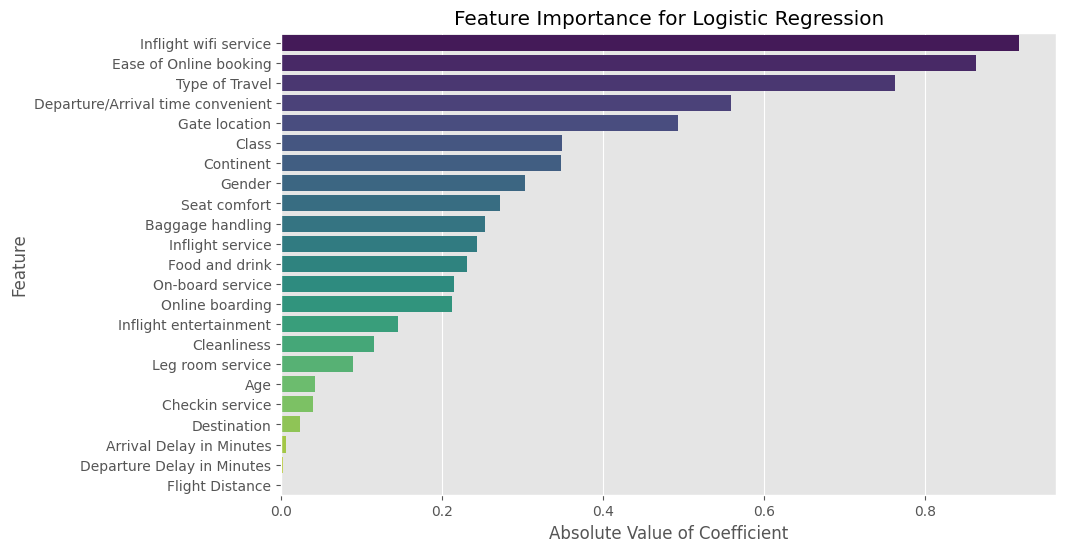

In [ ]:
# Extract feature coefficients
coefficients = model.coef_[0]  # For binary classification, use [0] for the positive class

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Add absolute value of coefficients for sorting
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()

# Sort features by their absolute coefficient value
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance for Logistic Regression')
plt.xlabel('Absolute Value of Coefficient')
plt.ylabel('Feature')
plt.show()

Inflight wifi service , ease of online booking type of travel, depature/arrival time convenient ,gate location affected the model greatly as well saw during the exploratory analysis , that there was poor perofrmance in most of this variables/features

## random forest

Scaling is not needed in random forest as it is robust to scaling due to tree like alorigthm. It also has argument to handle imbalance data, it penalized the model by giving more weight to labels , thereby giving model importance to the minority

In [ ]:
Rf = RandomForestClassifier(class_weight='balanced',random_state=20)
Rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=20)

In [ ]:
# predictions
y_preds = Rf.predict(x_test)

In [ ]:
# classfication report
Rf_result = classification_report(y_test,y_preds,output_dict=True)
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3787
           1       0.99      1.00      0.99     16932

    accuracy                           0.99     20719
   macro avg       0.99      0.98      0.98     20719
weighted avg       0.99      0.99      0.99     20719



* The randomforestclassifier performed better across all the labels compared to the LogisticRegression model
* The model have a very high precision,recall and f1-score of almost one

Text(0.5, 1.0, 'Random forest confusion matrix')

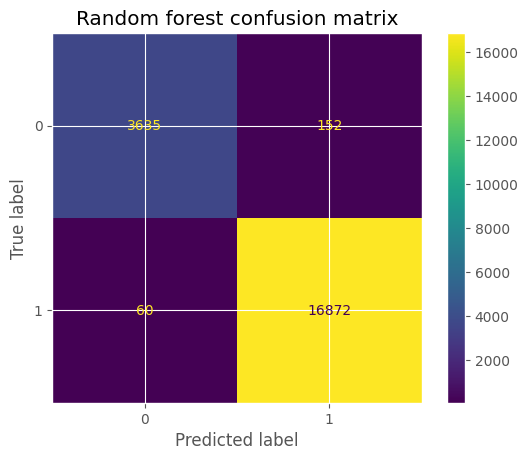

In [ ]:
# plotting confusion matrix
cm = confusion_matrix(y_test, y_preds, labels=Rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Rf.classes_)
disp.plot()
plt.title('Random forest confusion matrix')

<ipython-input-37-716c1156cbb7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


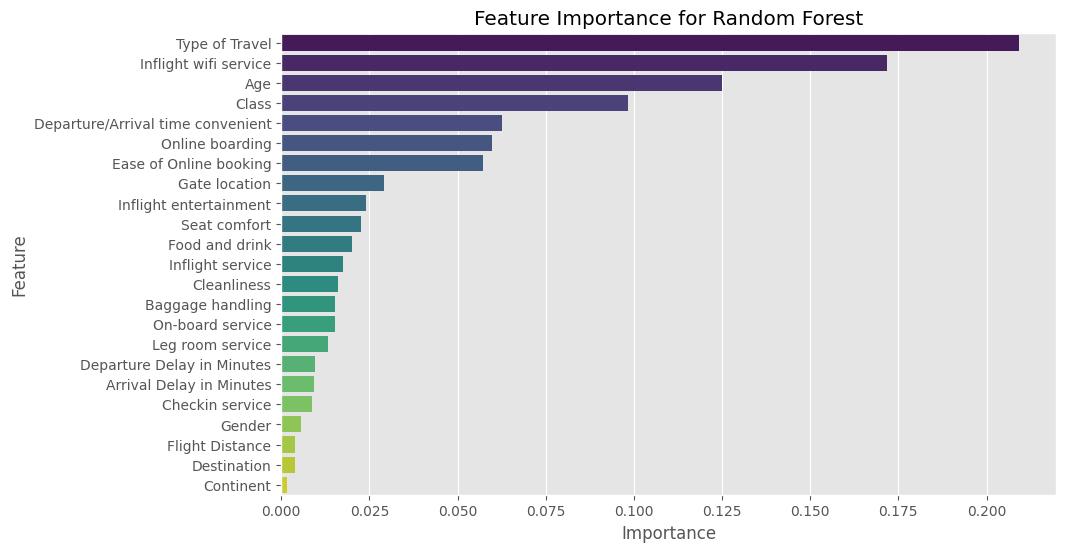

In [ ]:
### feature importance

# Extract feature importances
importances = Rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort features by their importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Similar features contributed to the Randomforestmodel as well as the LogisticRegression model, which intells , they are key features for making feature predictions

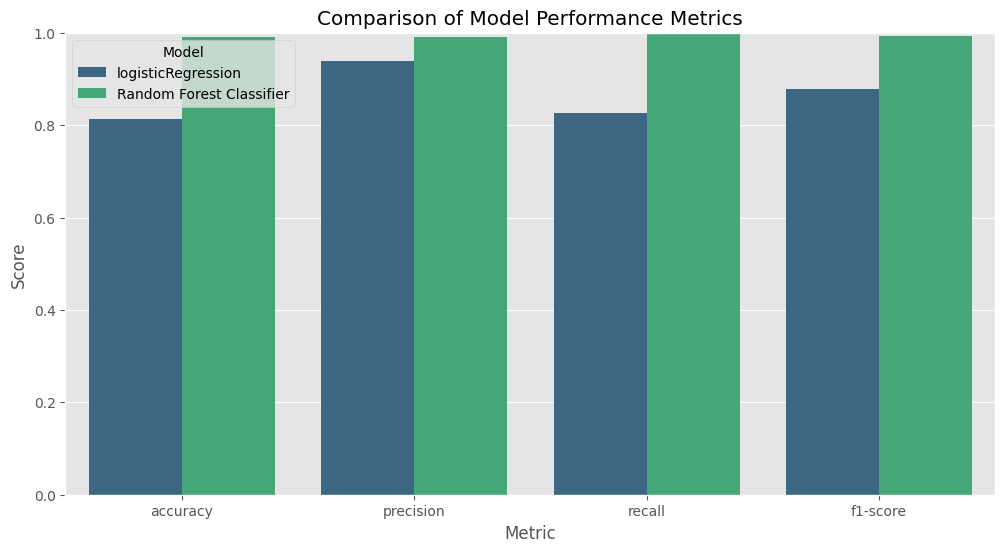

In [ ]:
# Extract metrics for each model
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
log_metrics = {metric: log_result['accuracy'] if metric == 'accuracy' else log_result['1'][metric] for metric in metrics}
Rf_metrics = {metric: Rf_result['accuracy'] if metric == 'accuracy' else Rf_result['1'][metric] for metric in metrics}

# Create a DataFrame for plotting
metrics_df = pd.DataFrame({
    'Metric': metrics,
    'logisticRegression': [log_metrics[metric] for metric in metrics],
    'Random Forest Classifier': [Rf_metrics[metric] for metric in metrics]
})

# Melt the DataFrame for plotting
metrics_df_melted = metrics_df.melt(id_vars='Metric', var_name='Model', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_df_melted, palette='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] to standardize metric scales
plt.show()